In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
Criteria = pd.read_csv('data/Criteria.csv')

In [39]:
Criteria.head()

,criterionId,lotId,name,weight,type
0,0,0,PRIX DES PRESTATIONS,40.0,PRICE
1,1,0,VALEUR TECHNIQUE,40.0,TECHNICAL
2,2,0,DELAI D'EXECUTION,20.0,DELAY
3,3,1,PRIX DES PRESTATIONS,40.0,PRICE
4,4,1,VALEUR TECHNIQUE,40.0,TECHNICAL


# Information about Criteria table

In [40]:
Criteria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910408 entries, 0 to 2910407
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   criterionId  int64  
 1   lotId        int64  
 2   name         object 
 3   weight       float64
 4   type         object 
dtypes: float64(1), int64(2), object(2)
memory usage: 111.0+ MB


Nous remarquant que y a bien 5 attributs dans la table criterion. Ainsi l'utilisation du type de données int64 indique que ces identifiants peuvent être des nombres entiers très grands. 

## criterionId column

Cette colonne stocke les identifiants uniques pour chaque critère.

In [57]:
criterionId = Criteria['criterionId']

### Type de l'attribut

In [58]:
criterionId.dtype

dtype('int64')

Même si les valeurs sont numériques, elles sont catégorielles car elles servent à identifier de manière unique chaque enregistrement plutôt qu'à représenter une mesure ou une quantité.

In [47]:
np.iinfo(np.int32).max

2147483647

In [44]:
np.iinfo(np.int64).max

9223372036854775807

In [45]:
criterionId

0                0
1                1
2                2
3                3
4                4
            ...   
2910403    2910403
2910404    2910404
2910405    2910405
2910406    2910406
2910407    2910407
Name: criterionId, Length: 2910408, dtype: int64

D'apres ces calculs, la décision d'utiliser un entier de 64 bits plutôt que de 32 bits mérite d'être discutée :

La valeur maximale pour un entier de 32 bits est : 2147483647

tandis que pour un entier de 64 bits, elle atteint: 9223372036854775807.

Étant donné qu'il y a 2910408 lots, même un entier de 32 bits serait suffisant

### Distribution

In [52]:
criterionId_d= criterionId.value_counts()

In [53]:
criterionId_d

criterionId
0          1
1940242    1
1940266    1
1940267    1
1940268    1
          ..
970138     1
970139     1
970140     1
970141     1
2910407    1
Name: count, Length: 2910408, dtype: int64

In [54]:
criterionId_d

criterionId
0          1
1940242    1
1940266    1
1940267    1
1940268    1
          ..
970138     1
970139     1
970140     1
970141     1
2910407    1
Name: count, Length: 2910408, dtype: int64

In [55]:
criterionId_d[criterionId_d>1]

Series([], Name: count, dtype: int64)

Il y a pas de valeurs dupliquées, ce qui confirme l'unicité des valeurs.

Pour cet attribut, vu que les valeurs sont uniques, ce qui signifie qu'ils n'ont pas une distribution de valeurs utile à visualiser comme pour les variables numériques continues ou catégorielles.

### Statistiques

Les mesures statistiques comme la moyenne, la médiane ou l'écart-type n'ont pas de sens pour une séquence de nombres uniques.Nous n'allons pas calculer les statistiques

### Missing values

In [56]:
criterionId.isna().sum()

0

Pas de valeurs manquantes ce qui est essentiel, car cela assure l'intégrité des données et permet des analyses ou des jointures de tables sans risque d'exclure des valeurs en raison de valeurs criterionId manquantes.

#### Valeurs abbérantes

Les valeurs sont incrémentable nous n'aurons pas de valeurs abbérantes.

## lotId column

lotId est la clé étrangère qui désignant le lot concerné

In [59]:
lotId= Criteria['lotId']

### Type de l'attribut

In [60]:
lotId.dtype

dtype('int64')

Même chose que **criterionId** les valeurs sont numériques, mais l'attribut est catégoriel car les valeurs servent à identifier de manière unique chaque Lot plutôt qu'à représenter une mesure ou une quantité.

In [61]:
lotId

0                0
1                0
2                0
3                1
4                1
            ...   
2910403    1380955
2910404    1380956
2910405    1380956
2910406    1380958
2910407    1380958
Name: lotId, Length: 2910408, dtype: int64

Meme remarque aussi sur le type de la variable, un entier de 32 bits serait suffisant.

### Distribution

In [62]:
lotId_c = lotId.value_counts()

In [63]:
lotId_c

lotId
448597     87
448586     87
448588     87
448589     87
448590     87
           ..
1194472     1
1194471     1
622421      1
789536      1
1070464     1
Name: count, Length: 1041242, dtype: int64

In [64]:
lotId_c[lotId_c>1]

lotId
448597    87
448586    87
448588    87
448589    87
448590    87
          ..
606249     2
619350     2
641558     2
606620     2
606619     2
Name: count, Length: 961186, dtype: int64

Cela nous indique combien de fois chaque lot a été évalué.C'est donc normal d'avaoir des valeurs dupliqué de cette attribut.

In [82]:
total_lotId = len(Criteria['lotId'])

In [83]:
unique_lotId= Criteria['lotId'].nunique()

In [86]:
duplicate_lotId = total_lotId - unique_lotId

In [94]:
noduplicate_lotId = lotId_c[lotId_c==1]

In [95]:
noduplicate_lotId

lotId
1228400    1
1349732    1
66118      1
913728     1
842619     1
          ..
1194472    1
1194471    1
622421     1
789536     1
1070464    1
Name: count, Length: 80056, dtype: int64

In [87]:
percentage_duplicates = (duplicate_lotId / total_lotId) * 100

In [89]:
percentage_duplicates

64.2235040585375

Le pourcentage de 64.22 % pour lotId indique que cette proportion de vos entrées dans la colonne lotId sont des valeurs dupliquées, ce qui est conforme à l'attente que les critères peuvent être appliqués à plusieurs lots.

In [101]:
duplicate_lotId = Criteria[Criteria['lotId'].duplicated()]
unique_lotId = Criteria.drop_duplicates(subset=['lotId'])

# Préparation des données pour le graphique
data = {
    'Duplicated': len(duplicate_lotId),
    'Unique': len(unique_lotId)
}


In [103]:
def plot_duplicated(data):
    labels = data.keys()
    sizes = data.values()

    plt.figure(figsize=(8, 5))
    plt.bar(labels, sizes, color=['blue', 'orange'])
    plt.title('Nombre de valeurs uniques et dupliquées pour lotId')
    plt.ylabel('Nombre de valeurs')
    for i, v in enumerate(sizes):
        plt.text(i, v + 50, str(v), ha='center', va='bottom')
    plt.show()


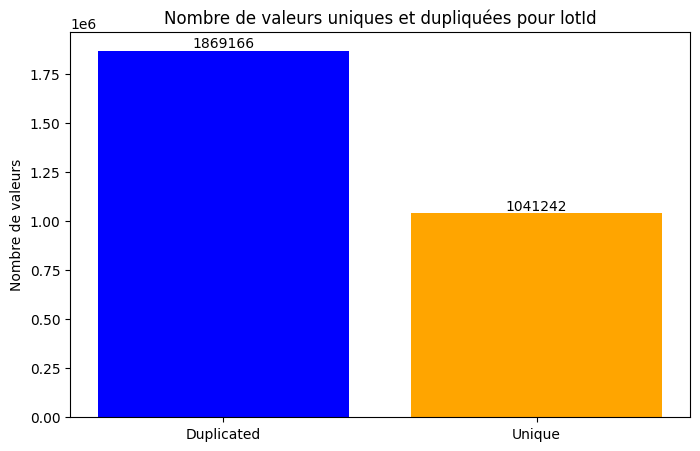

In [104]:
plot_duplicated(data)

### Statistiques

Les mesures statistiques comme la moyenne, la médiane ou l'écart-type n'ont pas de sens pour une séquence de nombres uniques.Nous n'allons pas calculer les statistiques pour cet attribut.

### Missing values

Pareil que l'attribut criterionId, pas de valeurs manquantes.

## name	 Column 

Cette colonne contient des chaînes de caractères représentant le nom de chaque critère.

In [106]:
name= Criteria['name']

### types d'attribut

In [109]:
name.dtype

dtype('O')

In [107]:
name.describe()

count     2910402
unique     236777
top          PRIX
freq       531514
Name: name, dtype: object

C'est une variable textuelle de type object. 

In [110]:
name

0                                       PRIX DES PRESTATIONS
1                                           VALEUR TECHNIQUE
2                                          DELAI D'EXECUTION
3                                       PRIX DES PRESTATIONS
4                                           VALEUR TECHNIQUE
                                 ...                        
2910403    MOYENS HUMAINS; ORGANISATION GENERALE; GESTION...
2910404                                                 PRIX
2910405    MOYENS HUMAINS; ORGANISATION GENERALE; GESTION...
2910406                           ORGANISATION ET RESSOURCES
2910407    THEMATIQUE URBAINE ARCHITECTURALE PAYSAGERE ET...
Name: name, Length: 2910408, dtype: object

Nous remarquant que certaines lots ont plusieurs criteres.

### Distribution

In [111]:
nameCountByValue = name.value_counts()

In [112]:
nameCountByValue

name
PRIX                                                                                                                    531514
VALEUR TECHNIQUE                                                                                                        350308
PRIX DES PRESTATIONS                                                                                                    127532
VALEUR TECHNIQUE DE L'OFFRE                                                                                              36646
DELAI DE LIVRAISON                                                                                                       29520
                                                                                                                         ...  
VALEUR TECHNIQUE; JUGEE SUR LA BASE DU MEMOIRE TECHNIQUE TEL QUE DEFINI A L'ARTICLE 4.2 DU REGLEMENT DE CONSULTATION         1
QUALITE DU SAV; GARANTIE ET FORMATION                                                                     

In [113]:
nameCountByValue.max()

531514

In [114]:
nameCountByValue.min()

1

In [124]:
nameCountByValue.describe()

count    159.000000
mean       6.289308
std       13.875735
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      118.000000
Name: count, dtype: float64

In [153]:
name_counts = Criteria['name'].value_counts()

### Missing values

In [128]:
name.isna().sum()

6

Le résultat 6 signifie qu'il y a six entrées dans la colonne name qui sont considérées comme manquantes.Cela peut être dû à un oubli, à l'indisponibilité des informations au moment de la collecte des données, ou à d'autres facteurs qui empêchent la saisie de ces données.

Nous pouvons considerer que cela est normal si ces lots n'ont pas de critéres.

## weight Column 

Cette variable représente le poids ou l'importance de chaque critère, exprimé par un nombre à virgule flottante (float64).

In [133]:
weight=criterion['weight']

### Type d'attribut

In [ ]:
weight.dtype

dtype('float64')

In [ ]:
weight

0          40.0
1          40.0
2          20.0
3          40.0
4          40.0
           ... 
2910403    50.0
2910404    50.0
2910405    50.0
2910406    50.0
2910407    50.0
Name: weight, Length: 2910408, dtype: float64

### Distribution

In [ ]:
weight.value_counts()

weight
40.000000    478830
60.000000    350802
30.000000    261742
10.000000    229329
50.000000    229192
              ...  
42.696629         1
57.303371         1
74.626866         1
70.000000         1
31.428571         1
Name: count, Length: 2941, dtype: int64

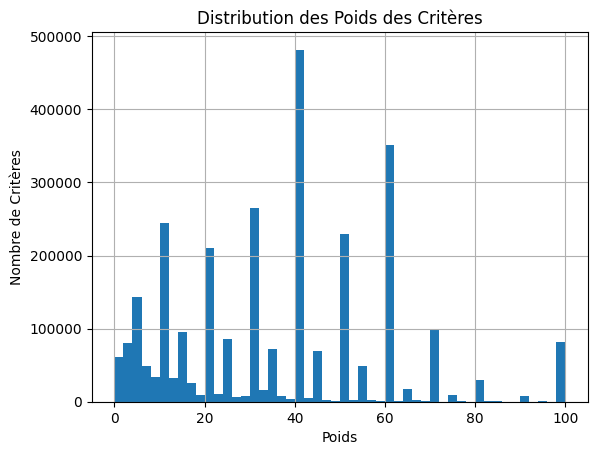

In [169]:

Criteria['weight'].hist(bins=50)
plt.xlabel('Poids')
plt.ylabel('Nombre de Critères')
plt.title('Distribution des Poids des Critères')
plt.show()

 Nous remarquant que il y a une quantité notable de critères avec un poids de 0, ce qui peut indiquer des critères non applicables, optionnels, ou d'aucune importance dans certaines évaluations.

 Ainsi Il y a un creux dans la distribution entre les deux pics principaux, indiquant une absence relative de critères avec des poids moyens entre ces deux valeurs.

### Statistiques 

In [156]:
weight.describe()

count    2.910408e+06
mean     3.577650e+01
std      2.298320e+01
min      0.000000e+00
25%      1.500000e+01
50%      3.750000e+01
75%      5.000000e+01
max      1.000000e+02
Name: weight, dtype: float64

### Valeurs abberantes

In [165]:
weight.max()

100.0

In [163]:
weight.min()

0.0

In [171]:
Q1 = weight.quantile(0.25)
Q3 = weight.quantile(0.75)
IQR = Q3 - Q1
# Déterminer les bornes pour les valeurs aberrantes
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR

valeurs_aberrantes = Criteria[(weight < borne_inferieure) | (weight > borne_superieure)]

In [172]:
valeurs_aberrantes

,criterionId,lotId,name,weight,type


Pas de valeurs aberrantes d'aprés la méthode  des écarts interquartiles (IQR).

### Missing values

In [107]:
weight.isna().sum()

0

Pas de valeurs manquantes, toutes les critéres ont bien un poids

### Negatif values

In [113]:
NegatifValue = criterion[criterion['weight'] < 0]

In [114]:
NegatifValue

,criterionId,lotId,name,weight,type


In [129]:
criterion['weight'].mean()

35.77649594146251

In [141]:
percentage_min_weight =(min_weight_count / criterion['weight'].count())*100

In [142]:
percentage_min_weight

0.06724143144191468

Nous pouvons voir que seulement quelques lots n'ont pas de poids.

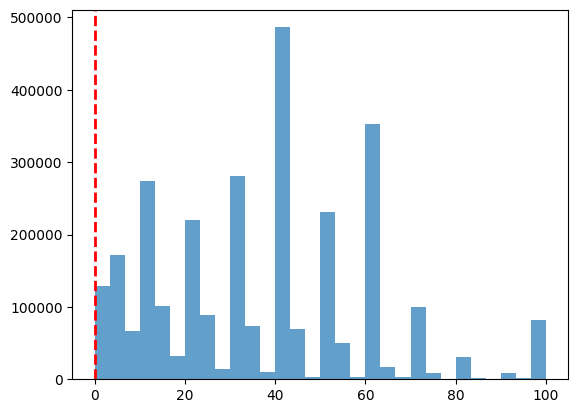

In [174]:
plt.hist(criterion['weight'], bins=30, alpha=0.7, label='Échantillon des poids')
plt.axvline(x=0, color='r', linestyle='dashed', linewidth=2, label='Valeur Min (0)')

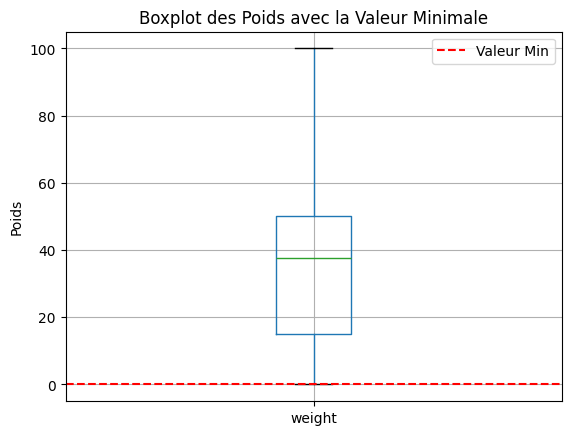

In [146]:
criterion.boxplot(column=['weight'])

plt.axhline(y=0, color='r', linestyle='dashed', label='Valeur Min')

# Afficher la légende et autres éléments graphiques
plt.legend()
plt.title('Boxplot des Poids avec la Valeur Minimale')
plt.ylabel('Poids')
plt.show()


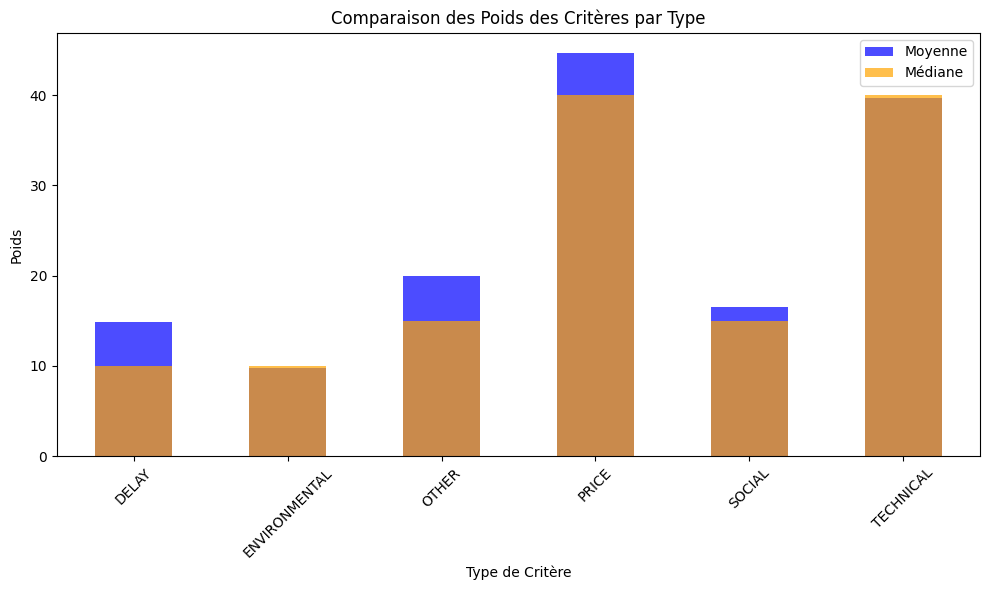

In [175]:
groupes_critere = Criteria.groupby('type')

# Calculer les statistiques descriptives pour chaque groupe
statistiques_poids = groupes_critere['weight'].describe()

plt.figure(figsize=(10, 6))
statistiques_poids['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Moyenne')
statistiques_poids['50%'].plot(kind='bar', color='orange', alpha=0.7, label='Médiane')
plt.title('Comparaison des Poids des Critères par Type')
plt.xlabel('Type de Critère')
plt.ylabel('Poids')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## type Column

Cet attribut décrit la catégorie ou le type de chaque critère, utilisant également le type de données object pour stocker des chaînes de texte.

In [177]:
type = Criteria['type']

### type d'attribut

In [178]:
type

0                  PRICE
1              TECHNICAL
2                  DELAY
3                  PRICE
4              TECHNICAL
               ...      
2910403           SOCIAL
2910404            PRICE
2910405           SOCIAL
2910406            OTHER
2910407    ENVIRONMENTAL
Name: type, Length: 2910408, dtype: object

In [179]:
type.describe()

count       2910408
unique            6
top       TECHNICAL
freq        1098843
Name: type, dtype: object

### Distribution

In [181]:
type.value_counts()

type
TECHNICAL        1098843
PRICE            1086700
OTHER             384431
DELAY             158923
ENVIRONMENTAL     152911
SOCIAL             28600
Name: count, dtype: int64

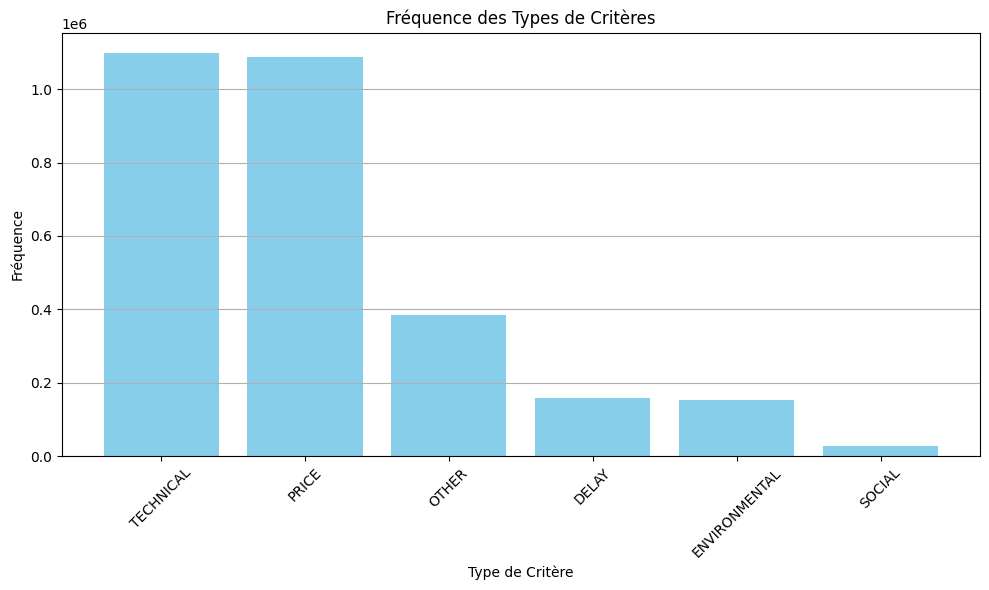

In [184]:


# Les fréquences des types de critères
type_frequency = {
    'TECHNICAL': 1098843,
    'PRICE': 1086700,
    'OTHER': 384431,
    'DELAY': 158923,
    'ENVIRONMENTAL': 152911,
    'SOCIAL': 28600
}

# Création d'un DataFrame à partir du dictionnaire
df_frequency = pd.DataFrame(list(type_frequency.items()), columns=['Type', 'Fréquence'])

# Tri des données par fréquence décroissante
df_frequency = df_frequency.sort_values(by='Fréquence', ascending=False)

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(df_frequency['Type'], df_frequency['Fréquence'], color='skyblue')
plt.title('Fréquence des Types de Critères')
plt.xlabel('Type de Critère')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Voici histogramme des poids pour chaque type de critère 

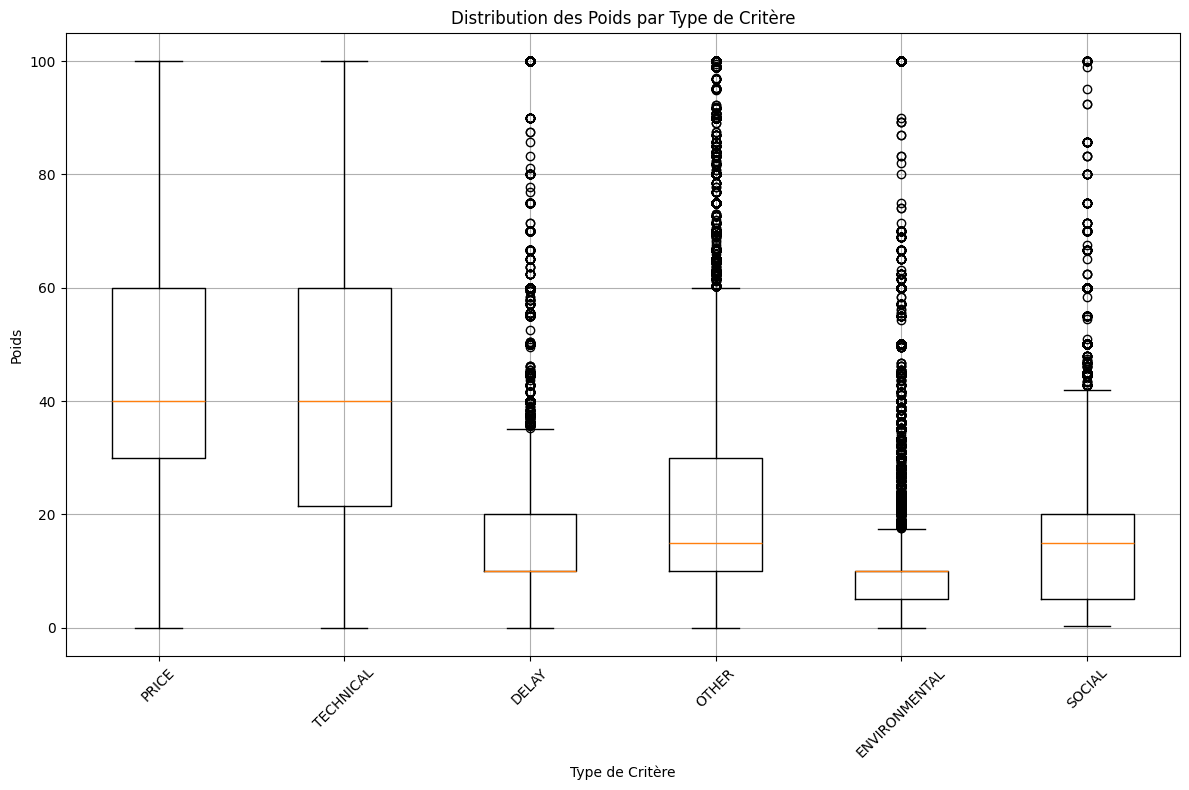

In [188]:
types_critere = type.unique()

# Création du boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([Criteria[type == critere]['weight'] for critere in types_critere], labels=types_critere)
plt.title('Distribution des Poids par Type de Critère')
plt.xlabel('Type de Critère')
plt.ylabel('Poids')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Statistique

Pas de statiqtique pour cet attribut car c'est un attribut de type objet.

### Missing values

In [185]:
missingtypeCount = type.isna().sum()

In [186]:
missingtypeCount

0

Pas de valeurs manquantes

## Problémes

In [187]:
is_numeric = criterion['type'].apply(lambda x: x.isdigit() if isinstance(x, str) else False)

In [154]:
criterion['type'][is_numeric]

Series([], Name: type, dtype: object)

In [13]:
is_lowercase = criterion['type'].apply(lambda x: x.islower() if isinstance(x, str) else False)

In [191]:
criterion['type'][is_lowercase]

Series([], Name: type, dtype: object)

Tous les types sont en majuscule

In [159]:
criterion['type'].unique()

array(['PRICE', 'TECHNICAL', 'DELAY', 'OTHER', 'ENVIRONMENTAL', 'SOCIAL'],
      dtype=object)

In [162]:
criterion.groupby('type')['weight'].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
DELAY,158923.0,14.827680,10.796953,0.002000,10.000000,10.0,20.0,100.0
ENVIRONMENTAL,152911.0,9.756125,8.539454,0.000006,5.000000,10.0,10.0,100.0
OTHER,384431.0,19.938695,16.576581,0.000006,10.000000,15.0,30.0,100.0
PRICE,1086700.0,44.660055,21.759821,0.000000,30.000000,40.0,60.0,100.0
SOCIAL,28600.0,16.459032,13.014748,0.312500,5.000000,15.0,20.0,100.0
TECHNICAL,1098843.0,39.685432,21.325653,0.000006,21.428571,40.0,60.0,100.0


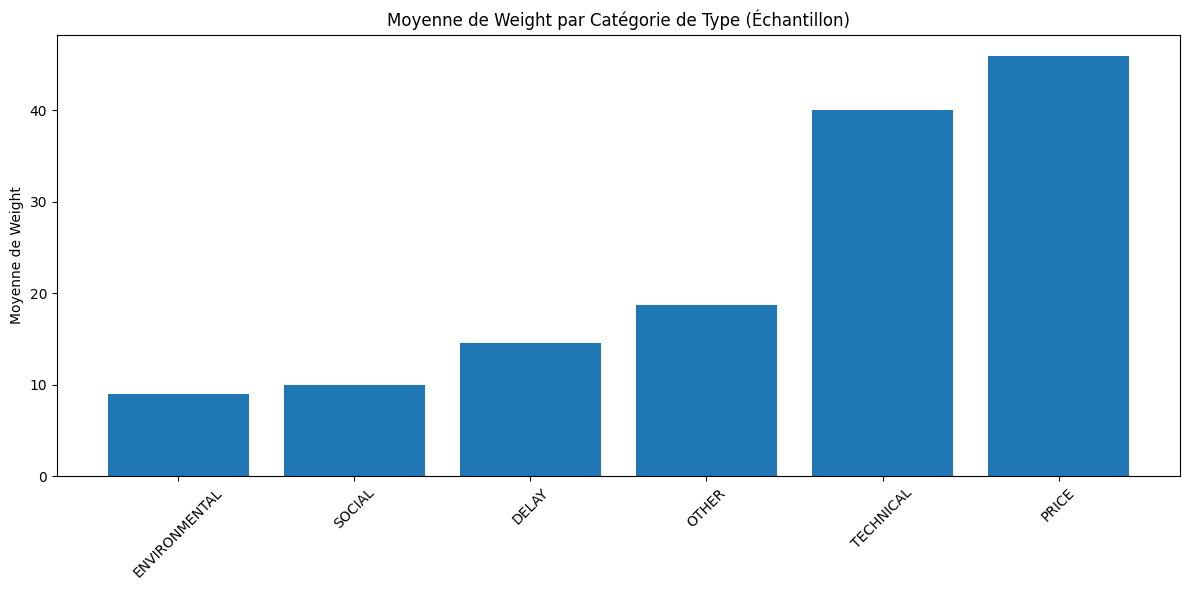

In [171]:
import matplotlib.pyplot as plt

mean_weights_per_type = sample_df.groupby('type')['weight'].mean()

sorted_types = mean_weights_per_type.sort_values().index
sorted_means = mean_weights_per_type.sort_values()

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_types)), sorted_means, tick_label=sorted_types)

plt.xticks(rotation=45)
plt.ylabel('Moyenne de Weight')
plt.title('Moyenne de Weight par Catégorie de Type (Échantillon)')

plt.tight_layout()
plt.show()


# Corrélation 

La corrélation entre "name" et "type" 

In [214]:
correlation_name_type = Criteria['name'].astype('category').cat.codes.corr(criterion['type'].astype('category').cat.codes, method='spearman')
print("coefficient de Spearman :", correlation_name_type)


coefficient de Spearman : 0.5781952543714047


In [215]:
NT = Criteria[['type', 'name']]

In [216]:
NT= NT.dropna()

In [217]:
gb_1 = NT.groupby(['type','name']).size().unstack(fill_value=0)

In [223]:
def plot_categorial_categorical(
    data,
    title,
    xlabel,
    ylabel,
    logy=True
):
    data.plot(kind='bar', stacked=False)
    # Adding titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale('log')
    plt.show()

In [225]:
from ipynb.fs.full.step02 import plot_categorial_categorical


ModuleNotFoundError: No module named 'ipynb'

In [224]:
plot_categorial_categorical(
    data=gb_1,
    title="La corrélation entre name et type",
    xlabel="name",
    ylabel="type",
    logy=True
)

KeyboardInterrupt: 

Corrélation entre "name" et "weight" :

In [207]:
Criteria['weight'] = pd.to_numeric(Criteria['weight'], errors='coerce') 
Criteria['name'] = Criteria['name'].astype('category').cat.codes  
correlation_name_weight = Criteria['name'].corr(Criteria['weight'])

print("Coefficient de corrélation entre Name et Weight :", correlation_name_weight)


Coefficient de corrélation entre Name et Weight : 0.29855883078609213


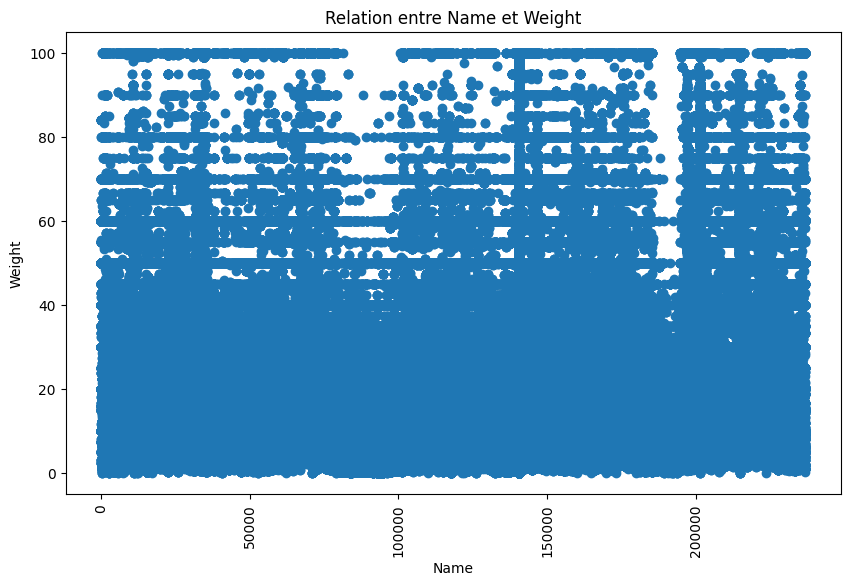

In [211]:
# Graphique de dispersion entre name et weight
plt.figure(figsize=(10, 6))
plt.scatter(Criteria['name'], Criteria['weight'])
plt.title('Relation entre Name et Weight')
plt.xlabel('Name')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()


 Corrélation entre "weight" et "type" :

In [208]:
Criteria['weight'] = pd.to_numeric(Criteria['weight'], errors='coerce')  # Convertir en type float
Criteria['type'] = Criteria['type'].astype('category').cat.codes  # Convertir en codes catégoriels

correlation_weight_type = Criteria['weight'].corr(Criteria['type'])

print("Corrélation entre Weight et Type :", correlation_weight_type)


Corrélation entre Weight et Type : 0.3217070258393528


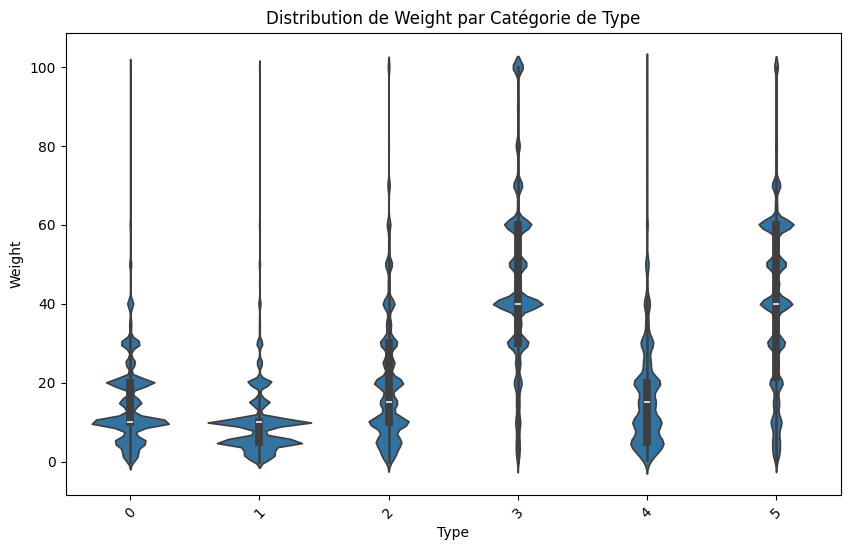

In [209]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='weight', data=Criteria)
plt.title('Distribution de Weight par Catégorie de Type')
plt.xlabel('Type')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()